In [ ]:
import gzip
import gensim
import logging

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [ ]:
!pip install ipython-autotime
%load_ext autotime

  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
time: 316 µs (started: 2024-09-19 03:38:40 +00:00)


In [ ]:
!pip install fasttext
!pip install gdown

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 5.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.13.6-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.13.6-py3-none-any.whl (243 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp310-cp310-linux_x86_64.whl size=4296187 sha256=10fa48a6e75cf7118ae64bf9f7fd5316e296fe6d3ef2e2db9640bb32d35a0af1
  Stored in directory: /root/.cache/pip/wheels/0d/a2/00/81db54d3e6a8199b829d58e02cec2ddb20ce3e59fad8d3c92a
Successfully built fasttext
time: 58.4 s (started: 2024-09-19 03:38:40 +00:00)


In [ ]:
import numpy as np
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors
import os

time: 2.19 ms (started: 2024-09-19 03:39:38 +00:00)


In [ ]:

import gensim.downloader as api

# Load pre-trained Word2Vec model
model = api.load('word2vec-google-news-300')

all_words = list(model.key_to_index.keys())

word_embeddings_w2v = {}
for word in model.key_to_index:
    word_embeddings_w2v[word] = model[word]

print(f"Total number of words: {len(all_words)}")
print(f"Dimension of each word vector: {len(word_embeddings_w2v[all_words[0]])}")

[==================================================] 100.0% 1662.8/1662.8MB downloaded
Total number of words: 3000000
Dimension of each word vector: 300
time: 5min 27s (started: 2024-09-19 03:39:38 +00:00)


In [ ]:
print(len(word_embeddings_w2v.keys()))

3000000
time: 382 µs (started: 2024-09-19 03:45:06 +00:00)


In [ ]:
import random

def pick_random_pairs(dictionary, num_pairs,seed):
    random.seed(seed)
    keys = list(dictionary.keys())
    random.shuffle(keys)
    random_pairs = {}
    for key in keys[:num_pairs]:
        random_pairs[key] = dictionary[key]
    return random_pairs

random_embeddings = pick_random_pairs(word_embeddings_w2v,100000,7)

time: 2.54 s (started: 2024-09-19 03:45:06 +00:00)


In [ ]:
import numpy as np
from sklearn.preprocessing import normalize

def normalize_word_embeddings(embeddings):
    # Extract the word vectors and store them in a numpy array
    embeddings_values = np.array(list(embeddings.values()))

    # Normalize the word embeddings
    normalized_embeddings = normalize(embeddings_values)

    # Update the normalized embeddings back in the dictionary
    for i, word in enumerate(embeddings.keys()):
        embeddings[word] = normalized_embeddings[i]

    return embeddings

time: 296 ms (started: 2024-09-19 03:45:08 +00:00)


In [ ]:
# Call the function to get normalized word embeddings
#normalized_embeddings = normalize_word_embeddings(word_embeddings)
random_normalized_embeddings = normalize_word_embeddings(random_embeddings)
#print(normalized_embeddings)

time: 335 ms (started: 2024-09-19 03:45:09 +00:00)


In [ ]:
len(random_normalized_embeddings.keys())

100000

time: 2.14 ms (started: 2024-09-19 03:45:09 +00:00)


In [ ]:
'''from sklearn.metrics.pairwise import cosine_similarity

def embedding_cosine_similarity(embedding1,embedding2):
    embedding1 = embedding1.reshape(1, -1)
    embedding2 = embedding2.reshape(1, -1)
    return cosine_similarity(embedding1,embedding2)'''

'from sklearn.metrics.pairwise import cosine_similarity\n\ndef embedding_cosine_similarity(embedding1,embedding2):\n    embedding1 = embedding1.reshape(1, -1)\n    embedding2 = embedding2.reshape(1, -1)\n    return cosine_similarity(embedding1,embedding2)'

time: 2.33 ms (started: 2024-09-19 03:45:09 +00:00)


In [ ]:
'''def count_boxes_greater_than(embedding, box_size):
    side_lengths = np.max(embedding, axis=1) - np.min(embedding, axis=1)
    num_boxes = np.sum(side_lengths > box_size)
    return num_boxes'''

'def count_boxes_greater_than(embedding, box_size):\n    side_lengths = np.max(embedding, axis=1) - np.min(embedding, axis=1)\n    num_boxes = np.sum(side_lengths > box_size)\n    return num_boxes'

time: 2.46 ms (started: 2024-09-19 03:45:09 +00:00)


In [ ]:
#DO NOT RUN THIS CODE CURRENTLY, NEED TO REVISIT.
'''import numpy as np
import faiss
import matplotlib.pyplot as plt
from scipy.stats import linregress

num_clusters = 256
quantizer = faiss.IndexFlatL2(embedding_vectors.shape[1])
index = faiss.IndexIVFFlat(quantizer, embedding_vectors.shape[1], num_clusters)
index.train(embedding_vectors)
index.add(embedding_vectors)
_, similar_indices = index.search(embedding_vectors, num_similar)


def calculate_fractal_value(embeddings, random_embeddings, box_sizes, k):

    embedding_vectors = np.array(list(embeddings.values()))
    random_vectors = np.array(list(random_embeddings.values()))

    # Initialize Faiss index
    embedding_dim = embedding_vectors.shape[1]
    index = faiss.IndexFlatL2(embedding_dim)

    # Add embeddings to the Faiss index
    index.add(embedding_vectors)

    # Search for the nearest neighbors of all vectors
    neighbor_distances , neighbor_indices = index.search(random_vectors, k)

    # Calculating similarity values using the neighbor_distances and updating it.
    for i in range(neighbor_distances.shape[0]):
        for j in range(neighbor_distances.shape[1]):
            neighbor_distances[i][j] = embedding_cosine_similarity(embedding_vectors[i],embedding_vectors[neighbor_indices[i][j]])

    num_filled_boxes = []

    for box_size in box_sizes:
        side_lengths = np.max(neighbor_distances, axis=1) - np.min(neighbor_distances, axis=1)
        num_boxes = np.sum(side_lengths > box_size)
        num_filled_boxes.append(num_boxes)

    slope, intercept, _, _, _ = linregress(np.log10(box_sizes), np.log10(num_filled_boxes))

    fractal_dimension = -slope

    for i in range(embedding_vectors.shape[0]):
        num_boxes = 0
        num_filled_boxes = 0

        # Iterate over the similarity scores of each vector in chunks of box_size
        for j in range(0,neighbor_distances.shape[1],box_size):
            box_scores = neighbor_distances[i,j:j+box_size]

            for score in box_scores:
                if(score>0.5):
                    num_filled_boxes += 1

            num_boxes+=1

        fractal_dimension = np.log(num_filled_boxes) / np.log(num_boxes)
        fractal_dimensions.append(fractal_dimension)

    return fractal_dimension, num_filled_boxes

#DO NOT RUN THIS CODE CURRENTLY, NEED TO REVISIT.
%%time
box_sizes = np.linspace(0.999, 0.111, 10, endpoint=False)
fractal_dimension, box_counts = calculate_fractal_value(normalized_embeddings,random_normalized_embeddings,box_sizes,1000)
print("Fractal Dimension:", fractal_dimension)

import matplotlib.pyplot as plt

# Plot the graph
plt.plot(box_sizes, box_counts, marker='o', linestyle='-')
plt.xlabel('Box Sizes')
plt.ylabel('Box Counts')
plt.title('Box Counting Graph')
plt.grid(True)
plt.show()'''

'import numpy as np\nimport faiss\nimport matplotlib.pyplot as plt\nfrom scipy.stats import linregress\n\nnum_clusters = 256\nquantizer = faiss.IndexFlatL2(embedding_vectors.shape[1])\nindex = faiss.IndexIVFFlat(quantizer, embedding_vectors.shape[1], num_clusters)\nindex.train(embedding_vectors)\nindex.add(embedding_vectors)\n_, similar_indices = index.search(embedding_vectors, num_similar)\n\n\ndef calculate_fractal_value(embeddings, random_embeddings, box_sizes, k):\n\n    embedding_vectors = np.array(list(embeddings.values()))\n    random_vectors = np.array(list(random_embeddings.values()))\n\n    # Initialize Faiss index\n    embedding_dim = embedding_vectors.shape[1]\n    index = faiss.IndexFlatL2(embedding_dim)\n\n    # Add embeddings to the Faiss index\n    index.add(embedding_vectors)\n\n    # Search for the nearest neighbors of all vectors\n    neighbor_distances , neighbor_indices = index.search(random_vectors, k)\n\n    # Calculating similarity values using the neighbor_dist

time: 2.39 ms (started: 2024-09-19 03:45:09 +00:00)


In [ ]:
!pip install faiss-gpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 MB 24.4 MB/s eta 0:00:00
time: 6.54 s (started: 2024-09-19 03:45:09 +00:00)


In [ ]:
#Using spheres
#This code can be run.

import numpy as np
import faiss
import matplotlib.pyplot as plt

def correlation_dimension_faiss(data, max_radius, num_radii=20,k=100):
    """
    Calculate the correlation dimension of the dataset using Faiss.

    :param data: numpy array of shape (n_samples, n_features)
    :param max_radius: maximum radius for correlation sum calculation
    :param num_radii: number of radii to use for calculation
    :return: radii, correlation_sum
    """
    n_samples, n_features = data.shape

    # Convert data to float32 (required by Faiss)
    data = data.astype(np.float32)

    # Create Faiss index
    index = faiss.IndexFlatL2(n_features)
    index.add(data)

    # Generate radii
    radii = np.logspace(-1, np.log10(max_radius), num_radii)

    # Calculate correlation sum for each radius
    correlation_sum = np.zeros(num_radii)
    for i, r in enumerate(radii):
        # Count number of neighbors within radius r for each point
        #print(index.range_search(data, r**2))
        #neighbors = index.range_search(data, r**2)  # Faiss uses squared distances
        #correlation_sum[i] = len(neighbors) / (n_samples * (n_samples - 1))

        distances, _ = index.search(data, k)

        # Count number of neighbors within radius r for each point
        count_within_radius = np.sum(distances < r**2, axis=1) - 1  # subtract 1 to exclude the point itself
        total_count = np.sum(count_within_radius)
        correlation_sum[i] = max(total_count / (n_samples * (n_samples - 1)), 1e-10)

    return radii, correlation_sum

def estimate_fractal_dimension(radii, correlation_sum):
    """
    Estimate fractal dimension from the slope of log-log plot.

    :param radii: array of radii used
    :param correlation_sum: array of correlation sums
    :return: estimated fractal dimension
    """
    log_radii = np.log(radii)
    log_correlation_sum = np.log(correlation_sum)

    print(log_radii,log_correlation_sum)
    # Linear regression to find slope
    coeffs = np.polyfit(log_radii, log_correlation_sum, deg=1)
    return coeffs[0]

time: 27.8 ms (started: 2024-09-19 03:45:15 +00:00)


[-2.30258509 -2.03129687 -1.76000864 -1.48872041 -1.21743218 -0.94614395
 -0.67485573 -0.4035675  -0.13227927  0.13900896  0.41029719  0.68158541
  0.95287364  1.22416187  1.4954501   1.76673833  2.03802655  2.30931478
  2.58060301  2.85189124] [-23.02585093 -23.02585093 -22.33269375 -19.8477871  -16.62558348
 -14.42173637 -12.24291337 -10.56924695  -8.96471638  -6.95963728
  -6.91779561  -6.91779561  -6.91779561  -6.91779561  -6.91779561
  -6.91779561  -6.91779561  -6.91779561  -6.91779561  -6.91779561]
Estimated fractal dimension: 3.37


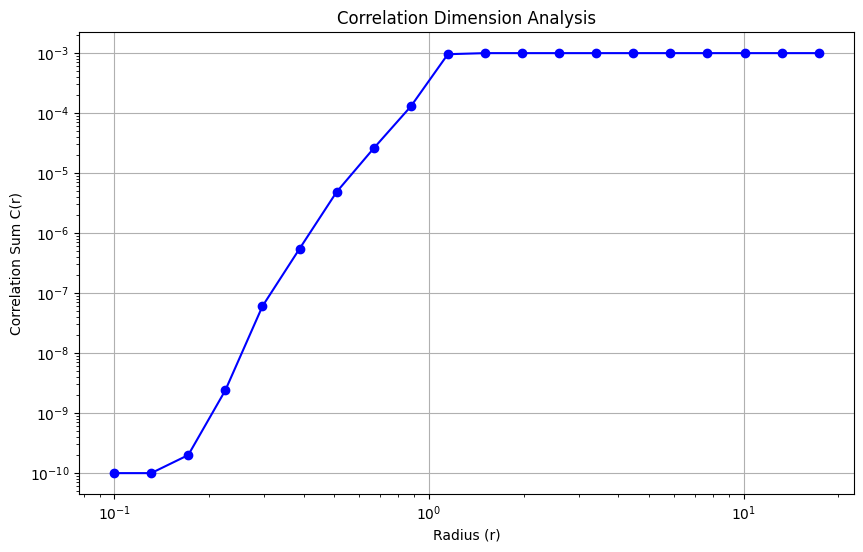

time: 32min 9s (started: 2024-09-19 03:45:15 +00:00)


In [ ]:
if __name__ == "__main__":

    n_samples, n_features = len(random_normalized_embeddings), len(list(random_normalized_embeddings.values())[0])
    embeddings_list = list(random_normalized_embeddings.values())

    # Convert to a NumPy array with dtype float32
    word_embeddings_fractal = np.array(embeddings_list, dtype=np.float32)

    # Calculate correlation dimension
    max_radius = np.sqrt(n_features)  # Maximum possible distance in the feature space
    radii, correlation_sum = correlation_dimension_faiss(word_embeddings_fractal, max_radius)

    # Estimate fractal dimension
    fractal_dim = estimate_fractal_dimension(radii, correlation_sum)

    print(f"Estimated fractal dimension: {fractal_dim:.2f}")

    # Plot results
    plt.figure(figsize=(10, 6))
    plt.loglog(radii, correlation_sum, 'bo-')
    plt.xlabel('Radius (r)')
    plt.ylabel('Correlation Sum C(r)')
    plt.title('Correlation Dimension Analysis')
    plt.grid(True)
    plt.show()

    #Word2vec google news - hugging face 3M words embeddings,Russian National corpus,, fasttext embeddings.
    #Complete works of shakesphere, word to word path connection, Projection wise fractal dimension calculation
    #Understand brazillians code.

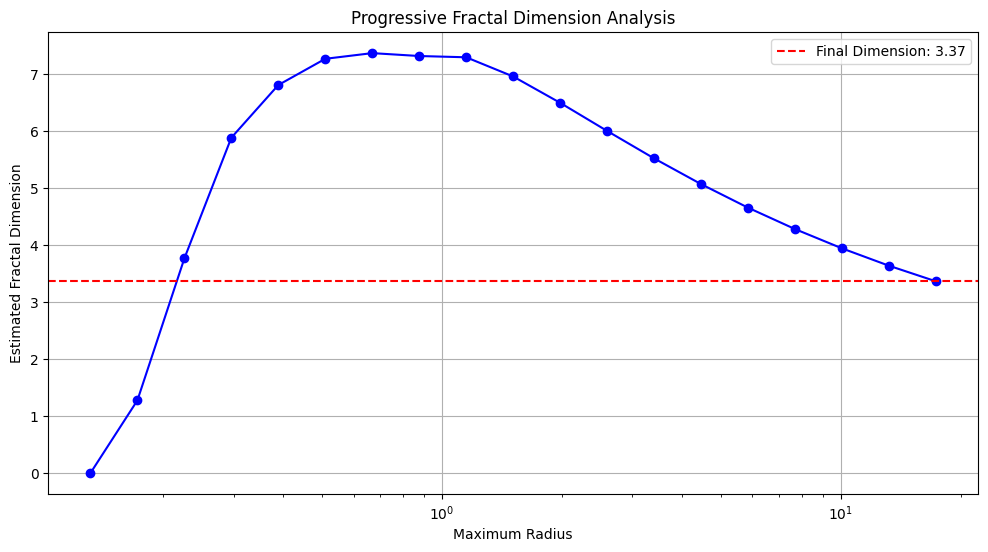

Final estimated fractal dimension: 3.37
Up to radius 0.1312: Estimated dimension = 0.00
Up to radius 0.1720: Estimated dimension = 1.28
Up to radius 0.2257: Estimated dimension = 3.77
Up to radius 0.2960: Estimated dimension = 5.89
Up to radius 0.3882: Estimated dimension = 6.81
Up to radius 0.5092: Estimated dimension = 7.28
Up to radius 0.6679: Estimated dimension = 7.38
Up to radius 0.8761: Estimated dimension = 7.32
Up to radius 1.1491: Estimated dimension = 7.30
Up to radius 1.5073: Estimated dimension = 6.97
Up to radius 1.9770: Estimated dimension = 6.50
Up to radius 2.5932: Estimated dimension = 6.01
Up to radius 3.4013: Estimated dimension = 5.53
Up to radius 4.4613: Estimated dimension = 5.08
Up to radius 5.8517: Estimated dimension = 4.66
Up to radius 7.6754: Estimated dimension = 4.29
Up to radius 10.0675: Estimated dimension = 3.95
Up to radius 13.2051: Estimated dimension = 3.64
Up to radius 17.3205: Estimated dimension = 3.37
time: 1min 37s (started: 2024-09-19 04:17:25 

In [ ]:
#Track progressive fractal dimension value, that is if I stop at 10^0 what is the fractal dimension before that?

import numpy as np
import faiss
import matplotlib.pyplot as plt

def correlation_dimension_faiss(data, max_radius, num_radii=20, k=100):
    n_samples, n_features = data.shape
    data = data.astype(np.float32)

    index = faiss.IndexFlatL2(n_features)
    index.add(data)

    radii = np.logspace(-1, np.log10(max_radius), num_radii)
    correlation_sum = np.zeros(num_radii)

    distances, _ = index.search(data, k)

    for i, r in enumerate(radii):
        count_within_radius = np.sum(distances < r**2, axis=1) - 1
        total_count = np.sum(count_within_radius)
        correlation_sum[i] = max(total_count / (n_samples * (n_samples - 1)), 1e-10)

    return radii, correlation_sum

def estimate_fractal_dimension(radii, correlation_sum):
    valid_indices = correlation_sum > 0
    log_radii = np.log(radii[valid_indices])
    log_correlation_sum = np.log(correlation_sum[valid_indices])

    if len(log_radii) < 2:
        return np.nan

    coeffs = np.polyfit(log_radii, log_correlation_sum, deg=1)
    return coeffs[0]

def progressive_fractal_dimension(data, max_radius, num_radii=20, k=100):
    radii, correlation_sum = correlation_dimension_faiss(data, max_radius, num_radii, k)
    progressive_dimensions = []

    for i in range(2, len(radii) + 1):
        dim = estimate_fractal_dimension(radii[:i], correlation_sum[:i])
        progressive_dimensions.append(dim)

    return radii[1:], progressive_dimensions

# Example usage
if __name__ == "__main__":

    n_samples, n_features = len(random_normalized_embeddings), len(list(random_normalized_embeddings.values())[0])
    embeddings_list = list(random_normalized_embeddings.values())

    word_embeddings_fractal = np.array(embeddings_list, dtype=np.float32)

    max_radius = np.sqrt(n_features)
    radii, progressive_dims = progressive_fractal_dimension(word_embeddings_fractal, max_radius)

    # Plot results
    plt.figure(figsize=(12, 6))
    plt.plot(radii, progressive_dims, 'bo-')
    plt.xscale('log')
    plt.xlabel('Maximum Radius')
    plt.ylabel('Estimated Fractal Dimension')
    plt.title('Progressive Fractal Dimension Analysis')
    plt.grid(True)

    # Add final estimated dimension to the plot
    final_dim = progressive_dims[-1]
    plt.axhline(y=final_dim, color='r', linestyle='--', label=f'Final Dimension: {final_dim:.2f}')
    plt.legend()

    plt.show()

    print(f"Final estimated fractal dimension: {final_dim:.2f}")

    # Print progressive dimensions
    for i, (r, dim) in enumerate(zip(radii, progressive_dims)):
        print(f"Up to radius {r:.4f}: Estimated dimension = {dim:.2f}")